<a href="https://colab.research.google.com/github/flowmasterB/tensorflow-flowmasterB-teaching/blob/main/01_Neural_Network_Regression_with_Tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [74]:
# Intro to neural network regression w/ tf
# predicting numbers as outcomes based on other numbers
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras import layers

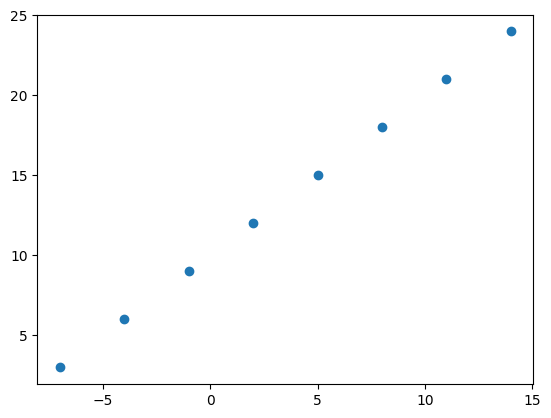

In [75]:
# create data to view and fit

# create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# creatwe labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# visualize
plt.scatter(X, y);

In [76]:
X + 10

array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])

In [77]:
y == X + 10 # relationship trying to learn -- the function between - ind var

array([ True,  True,  True,  True,  True,  True,  True,  True])

In [78]:
# input and output shapes
# create a demo tensor
house_info = tf.constant(["bedrooms", "bathrooms", "# of car(s) garage space"])
house_price = tf.constant([937000])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=
 array([b'bedrooms', b'bathrooms', b'# of car(s) garage space'],
       dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([937000], dtype=int32)>)

In [79]:
input_shape = X.shape
output_shape = y.shape
input_shape, output_shape

((8,), (8,))

In [80]:
X[0],  y[0]

(-7.0, 3.0)

In [81]:
# major steps in modeling w/ tf -- turn np arrays into tensors w/ dtype float32
X = tf.cast(tf.constant(X), dtype=tf.float32)
y = tf.cast(tf.constant(y), dtype=tf.float32)
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [82]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape # returned a scalar

(TensorShape([]), TensorShape([]))

# **Steps for ML modeling**
1. **create a model:** define the input and output layers, also to include the hidden layers of a deep learning model.
2. **compile the model:** the function which tells our model how wrong it is, and the optimizer, which tells our model how to improve the patterns it learns. Evaluation metrics, used to interpret model performance
3. **fiting a model:** letting the model find patterns between X AND Y, aka features

# **Steps in TF:**
1. Get data ready -- convert to tensors
2. build or pick a model to suit problem
3. fit the model to the data and make a prediction
4. evaluate the model
5. save and reload the trained model

In [83]:
# set random seed
tf.random.set_seed(42)

# 1. Create a model using sequential api
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1) # using one number to predict one number
])

#2. compile model
model.compile(loss=tf.keras.losses.mae, # mae = mean absolute error
              optimizer=tf.keras.optimizers.SGD(), # SGD stochastic gradient descent
              metrics=["mae"])

#3 fit the model
model.fit(tf.expand_dims(X, axis=1), y, epochs=5) # 5 tries to figure out a pattern


Epoch 1/5
1/1 [==============================] - 1s 530ms/step - loss: 11.6534 - mae: 11.6534
Epoch 2/5
1/1 [==============================] - 0s 12ms/step - loss: 11.5209 - mae: 11.5209
Epoch 3/5
1/1 [==============================] - 0s 11ms/step - loss: 11.3884 - mae: 11.3884
Epoch 4/5
1/1 [==============================] - 0s 14ms/step - loss: 11.2559 - mae: 11.2559
Epoch 5/5
1/1 [==============================] - 0s 18ms/step - loss: 11.1234 - mae: 11.1234


In [84]:
# check out X and y
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [85]:
# try to predict using the model
model.predict([27]) # not very good -- we were expecting an approx. return of 10

1/1 [==============================] - 0s 72ms/step


array([[19.02036]], dtype=float32)

# Improving the model
We can improve the model by altering/adjustiung the steps we used to create it.
1. create model -- add more layer, increase # of hidden units(neurons) within
each of the hidden layers - change activation function of each layer
2. compile model -- change optimization function -- learning rate hyper parameter of optimization function
3. fit model -- more epochs/rounds -- longer training time, or more examples to learn from

## lets create a larger model to see if we can improve our model and see if
## can predict the X + 10 fucntion pattern. Our first 5 epochs wasn't even close.


In [97]:
#1 create model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

#2 compile model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(lr=0.0001), # originally used SGD()
              # error was near 3 points - result was 29.87 -- Adam was very close!
              metrics=["mae"])
#3 fit the model
model.fit(tf.expand_dims(X, axis=1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 422ms/step - loss: 8.2836 - mae: 8.2836
Epoch 2/100
1/1 [==============================] - 0s 13ms/step - loss: 8.2791 - mae: 8.2791
Epoch 3/100
1/1 [==============================] - 0s 12ms/step - loss: 8.2746 - mae: 8.2746
Epoch 4/100
1/1 [==============================] - 0s 10ms/step - loss: 8.2701 - mae: 8.2701
Epoch 5/100
1/1 [==============================] - 0s 10ms/step - loss: 8.2656 - mae: 8.2656
Epoch 6/100
1/1 [==============================] - 0s 11ms/step - loss: 8.2611 - mae: 8.2611
Epoch 7/100
1/1 [==============================] - 0s 13ms/step - loss: 8.2566 - mae: 8.2566
Epoch 8/100
1/1 [==============================] - 0s 12ms/step - loss: 8.2521 - mae: 8.2521
Epoch 9/100
1/1 [==============================] - 0s 11ms/step - loss: 8.2476 - mae: 8.2476
Epoch 10/100
1/1 [==============================] - 0s 11ms/step - loss: 8.2431 - mae: 8.2431
Epoch 11/100
1/1 [==============================] - 0s 12ms/step - l

In [95]:
# show the data for a reminder
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [98]:
# LETS PREDICT! Did we improve?
model.predict([17.0])

1/1 [==============================] - 0s 101ms/step


array([[27.136837]], dtype=float32)

In [123]:
# Very nice... much better! using Adam reduced the error to within .136837
# remember my 1st run with SGD() as optimizer was 2.87 in error!
# Let's try to add more in baby steps towards a larger model.
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.1), # originally .0001
              metrics=["mae"])
model.fit(tf.expand_dims(X, axis=1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 628ms/step - loss: 13.2916 - mae: 13.2916
Epoch 2/100
1/1 [==============================] - 0s 11ms/step - loss: 12.8416 - mae: 12.8416
Epoch 3/100
1/1 [==============================] - 0s 9ms/step - loss: 12.3916 - mae: 12.3916
Epoch 4/100
1/1 [==============================] - 0s 11ms/step - loss: 11.9416 - mae: 11.9416
Epoch 5/100
1/1 [==============================] - 0s 26ms/step - loss: 11.4916 - mae: 11.4916
Epoch 6/100
1/1 [==============================] - 0s 13ms/step - loss: 11.0416 - mae: 11.0416
Epoch 7/100
1/1 [==============================] - 0s 12ms/step - loss: 10.5916 - mae: 10.5916
Epoch 8/100
1/1 [==============================] - 0s 12ms/step - loss: 10.1416 - mae: 10.1416
Epoch 9/100
1/1 [==============================] - 0s 13ms/step - loss: 9.6916 - mae: 9.6916
Epoch 10/100
1/1 [==============================] - 0s 12ms/step - loss: 9.2416 - mae: 9.2416
Epoch 11/100
1/1 [==============================] - 0

In [124]:
# now predict again and let's see...
model.predict([17.0])

1/1 [==============================] - 0s 55ms/step


array([[27.53354]], dtype=float32)

In [125]:
# not good -- adding the hidden layer made it worse, even with Adam --
# then used .1 as learning rate and got the above result

In [ ]:
#Evaluating a model